In [ ]:
#!pip install Keras
!pip install --user keras

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from keras.layers import Input,Dense
from keras.models import Model

In [ ]:
x,y  = make_blobs(n_samples = 300,centers = 4, random_state=42)

scaler = StandardScaler()
x_stan = scaler.fit_transform(x)

input_dim = x.shape[1]
encoding_dim =2

input_layer = Input(shape = input_dim)

encoded = Dense(encoding_dim,activation = 'relu')(input_layer)
decoded = Dense(input_dim,activation = 'sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer = 'adam',loss = 'mse')

autoencoder.fit(x_stan,x_stan,epochs = 50,batch_size = 32,shuffle = True)

encoder = Model(input_layer,encoded)

encoded_data = encoder.predict(x_stan)

kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(encoded_data)

Epoch 1/50
10/10 [==============================] - 1s 3ms/step - loss: 0.9616
Epoch 2/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9530
Epoch 3/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9445
Epoch 4/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9367
Epoch 5/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9293
Epoch 6/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9219
Epoch 7/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9153
Epoch 8/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9092
Epoch 9/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9030
Epoch 10/50
10/10 [==============================] - 0s 2ms/step - loss: 0.8975
Epoch 11/50
10/10 [==============================] - 0s 3ms/step - loss: 0.8919
Epoch 12/50
10/10 [==============================] - 0s 2ms/step - loss: 0.8866
Epoch 13/50
10/10 [==============================

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


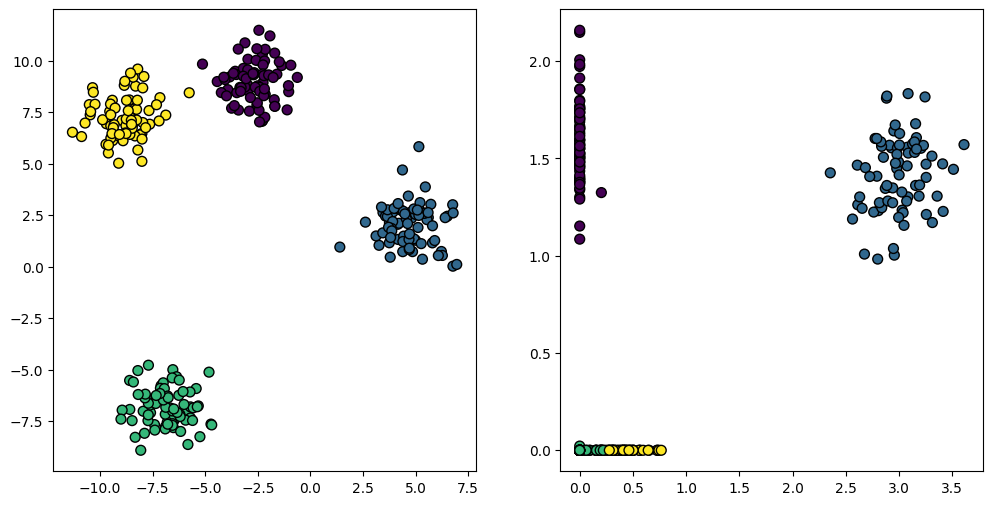

In [ ]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
plt.scatter(x[:,0],x[:,1],c=y,edgecolors='k',marker = 'o',s=50)
plt.title('')

plt.subplot(1,2,2)
plt.scatter(encoded_data[:,0],encoded_data[:,1],c=cluster_labels,cmap = 'viridis',edgecolors = 'k' ,marker = 'o',s=50)
plt.title('')
plt.show()